# Introduction to GeoDataFrames in GeoPandas
This notebook dives deeper into what GeoDataFrames are, how they work, and how to use them for geographic data analysis and visualization.

## What is a GeoDataFrame?
A **GeoDataFrame** is like a regular Pandas DataFrame, but it has special support for geographic geometry data via a `geometry` column. This makes it the backbone of geospatial analysis with GeoPandas.

## Viewing the Data
By loading a shapefile with `gpd.read_file()`, you create a GeoDataFrame. Let’s load the U.S. states shapefile and view the first few rows.

In [18]:
import geopandas as gpd

# Load shapefile
# states = gpd.read_file("states/States.shp")
# states = gpd.read_file('../../geopandas_101_DATA/us/cb_2024_us_state_20m.zip')
states = gpd.read_file('../../geopandas_101_DATA/us/Total_Population.geojson')

# Preview the first five rows
print(states.info())
states.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   37 non-null     int32   
 1   ShortDate  37 non-null     object  
 2   Value      37 non-null     int32   
 3   geometry   0 non-null      geometry
dtypes: geometry(1), int32(2), object(1)
memory usage: 1020.0+ bytes
None


,OBJECTID,ShortDate,Value,geometry
0,7,1987,99823,None
1,8,1988,101000,None
2,9,1989,101054,None
3,10,1990,102853,None
4,11,1991,105000,None


In [17]:
type(states['geometry'][0])

shapely.geometry.polygon.Polygon

## The `geometry` Column Explained
Every row in a GeoDataFrame has a geometry; each entry in the `geometry` column contains a shape object.

- Common geometry types:
  - **Point** – locations like cities, restaurants, or power plants
  - **LineString** – linear features like roads and rivers
  - **Polygon** – areas such as states, buildings, or parks

In our dataset, it’s a **polygon** representing each state.


## Visualizing the Data
To see the geometry in action, you can directly plot the GeoDataFrame. This is one of the most exciting parts—visual confirmation!

<Axes: >

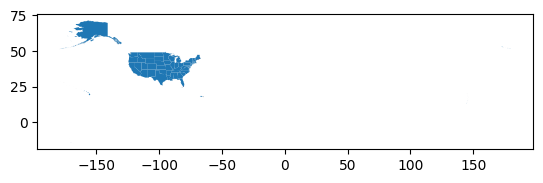

In [9]:
states.plot()

This will display a map of the continental United States. It’s a simple way to check that your spatial data loaded correctly.

## Reminder: A Geometry Column ≠ GeoDataFrame
You **can’t** create a GeoDataFrame just by adding a column called `geometry` to a regular DataFrame. GeoDataFrames are special objects created with GeoPandas. You must use GeoPandas to convert or construct them properly.

## Filtering GeoDataFrames
Just like with Pandas, you can filter your GeoDataFrame by any attribute. Let’s filter by population.

In [12]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198573403,726463825,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341552329,3387681983,"POLYGON ((-104.05788 44.9976, -104.05078 44.99..."
2,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131185042550,4582333181,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,149486268417,4418716153,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."
6,05,00068085,0400000US05,05,AR,Arkansas,00,134660743067,3121974727,"POLYGON ((-94.61792 36.49941, -94.61765 36.499..."
7,42,01779798,0400000US42,42,PA,Pennsylvania,00,115882119641,3397575101,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
8,29,01779791,0400000US29,29,MO,Missouri,00,178052253239,2487526202,"POLYGON ((-95.77355 40.5782, -95.76853 40.5833..."
9,08,01779779,0400000US08,08,CO,Colorado,00,268418736192,1185778676,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."


In [ ]:
# States with population > 10 million
high_pop = states[states['population'] > 10_000_000]
high_pop

In [ ]:
# Plot only the filtered high population states
high_pop.plot()

## Why Use GeoDataFrames?
In addition to Pandas-like capabilities (e.g. `.head()`, filtering), GeoDataFrames can:
- Be projected into different coordinate systems
- Perform spatial joins
- Buffer, intersect, and merge shapes
- Plot maps with automatic scaling and coordinate awareness

# Summary
- GeoDataFrames are DataFrames with a `geometry` column.
- The geometry can be polygons, points, or lines.
- Use `.plot()` to create visual maps.
- Use all regular DataFrame functions + powerful geospatial ones.

🎯 You’re now ready to explore spatial data with ease using GeoPandas!